In [20]:
include("DLProteinFormats.jl/src/DLProteinFormats.jl")
include("DLProteinFormats.jl/src/datasets.jl")

dat = load(PDBSimpleFlat500)

500-element merged(::Vector{@NamedTuple{len::Int64, cluster::Int32, locs::Array{Float32, 3}, rots::Array{Float32, 3}, AAs::Vector{Int64}, resinds::Vector{Int64}, chainids::Vector{Int64}}}):
 (len = 284, cluster = 1, locs = [-1.5650988; 2.1433976; -0.678789;;; -1.2520323; 2.2372642; -0.6696557;;; -1.047332; 2.1034641; -0.438589;;; … ;;; -0.06256523; 1.988464; -1.5433888;;; 0.21286812; 2.0770974; -1.6924889;;; 0.47250137; 2.1525974; -1.5293558], rots = [0.9812926 0.16513312 0.098975256; 0.09728891 -0.8689602 0.48522472; 0.16613224 -0.4665182 -0.86876976;;; 0.53069884 -0.84736216 0.018335996; -0.20018475 -0.14633785 -0.96876794; 0.8235805 0.51045346 -0.2472903;;; 0.531013 0.09742683 -0.84174407; 0.45814878 0.8026421 0.38192353; 0.71282876 -0.58845043 0.3815774;;; … ;;; 0.46879578 0.8827551 0.03120616; 0.6808074 -0.33858874 -0.6495068; -0.56278944 0.3257314 -0.75971514;;; 0.8795269 -0.09766555 0.46571887; 0.47123387 0.04278341 -0.88097006; 0.06611538 0.9942993 0.08365249;;; 0.9076783 -0.31

In [22]:
unflattend = DLProteinFormats.unflatten(dat[1].locs, dat[1].rots, dat[1].AAs, dat[1].resinds, dat[1].chainids)

284-element Vector{ProteinChain{Float32}}:
 1-residue ProteinChain{Float32} (1)
 1-residue ProteinChain{Float32} (2)
 1-residue ProteinChain{Float32} (3)
 1-residue ProteinChain{Float32} (4)
 1-residue ProteinChain{Float32} (5)
 1-residue ProteinChain{Float32} (6)
 1-residue ProteinChain{Float32} (7)
 1-residue ProteinChain{Float32} (8)
 1-residue ProteinChain{Float32} (9)
 1-residue ProteinChain{Float32} (10)
 ⋮
 1-residue ProteinChain{Float32} (276)
 1-residue ProteinChain{Float32} (277)
 1-residue ProteinChain{Float32} (278)
 1-residue ProteinChain{Float32} (279)
 1-residue ProteinChain{Float32} (280)
 1-residue ProteinChain{Float32} (281)
 1-residue ProteinChain{Float32} (282)
 1-residue ProteinChain{Float32} (283)
 1-residue ProteinChain{Float32} (284)

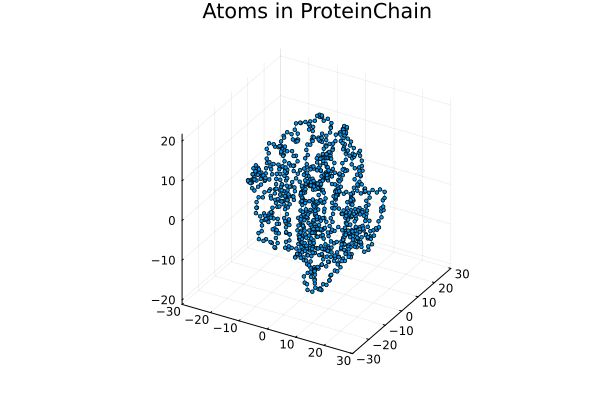

In [59]:
using Plots
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    title = "Atoms in ProteinChain",
    legend = false,
    marker = 2,
)

for protChain in unflattend
    atom_arr = get_atoms(protChain)[1]
    for atom in atom_arr
        push!(plt, ProteinChains.atom_coords(atom)[1], ProteinChains.atom_coords(atom)[2], ProteinChains.atom_coords(atom)[3])
    end
end

plot(plt)

In [ ]:
using GLMakie                              # interactive 3-D plots (OpenGL backend)

# ---- collect all atom coordinates in one pass ----
xs = Float32[]
ys = Float32[]
zs = Float32[]

for protChain in unflattend
    for atom in get_atoms(protChain)[1]
        x, y, z = ProteinChains.atom_coords(atom)
        push!(xs, x)
        push!(ys, y)
        push!(zs, z)
    end
end

# ---- build the interactive 3-D scene ----
fig = Figure(resolution = (800, 800))
ax  = Axis3(fig[1, 1];
            title = "Atoms in ProteinChain",
            perspectiveness = 0.75, # makes rotation feel more natural
            viewmode = :fitzoom) # Change to :fit to avoid "pumping" effect

GLMakie.scatter!(ax, xs, ys, zs;
         markersize = 12,
         transparency = true)

fig

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\User\.julia\packages\Makie\FUAHr\src\scenes.jl:238
